In [2]:
import requests
import time
from bs4 import BeautifulSoup
import forecastio
from selenium import webdriver

##### 자동화
- https://radajin661456067.wordpress.com
- 2개의 계정, 2개의 메시지, 2개의 게시글에 총 8개의 댓글을 자동으로 작성
- 게시물의 링크를 크롤링
- 각 게시물로 가서 댓글을 작성
    - 댓글 작성 레이어를 클릭
    - 댓글 작성
    - 이메일, 이름 추가
    - 댓글 작성 버튼 클릭

In [4]:
# 브라우저 열고 워드프레스로 이동
url = "https://radajin661456067.wordpress.com/"
driver = webdriver.Chrome()
driver.get(url)

In [6]:
links = []
articles = driver.find_elements_by_css_selector("#main > article")
for article in articles:
    links.append(article.find_element_by_css_selector(".entry-title > a").get_attribute("href"))

links

['https://radajin661456067.wordpress.com/2018/06/21/%ed%85%8c%ec%8a%a4%ed%8a%b8/',
 'https://radajin661456067.wordpress.com/2018/06/21/%ec%b2%ab-%eb%b2%88%ec%a7%b8-%eb%b8%94%eb%a1%9c%ea%b7%b8-%ea%b8%80/']

In [7]:
# 링크 이동
driver.get(links[0])

In [8]:
# 스크롤 아래로 내리기
script = "window.scrollTo(0,10000);"
driver.execute_script(script)

In [9]:
# 댓글 작성 영역 클릭
driver.find_element_by_css_selector("#comment-form-comment").click()

In [10]:
# 댓글 작성
driver.find_element_by_css_selector("#comment").send_keys("데사스스")

In [11]:
# 스크롤 아래로 내리기
script = "window.scrollTo(0,10000);"
driver.execute_script(script)

In [12]:
# 이메일 이름 입력
# email, author
driver.find_element_by_css_selector("#email").clear() #체이닝 안 돼서 send_keys 못 붙임
driver.find_element_by_css_selector("#email").send_keys("ashaelf70@google.com")
driver.find_element_by_css_selector("#author").clear()
driver.find_element_by_css_selector("#author").send_keys("mmmm")

In [13]:
# 작성 버튼 클릭
driver.find_element_by_css_selector("#comment-submit").click()

In [16]:
def write_comment(driver, link, msg, email, name):
    driver.get(link)
    script = "window.scrollTo(0,10000);"
    driver.execute_script(script)
    time.sleep(1)
    driver.find_element_by_css_selector("#comment-form-comment").click()
    time.sleep(1)
    driver.find_element_by_css_selector("#comment").send_keys(msg)
    driver.execute_script(script)
    time.sleep(1)
    driver.find_element_by_css_selector("#email").clear() #체이닝 안 돼서 send_keys 못 붙임
    driver.find_element_by_css_selector("#email").send_keys(email)
    time.sleep(1)
    driver.find_element_by_css_selector("#author").clear()
    driver.find_element_by_css_selector("#author").send_keys(name)
    time.sleep(1)
    driver.find_element_by_css_selector("#comment-submit").click()

In [17]:
users = [
    {"name":"kim1", "email":"willmoments@goodgun.co.kr"},
    {"name":"kim2", "email":"asahelf@goodgun.co.kr"},
]
msgs = ["알귀", "데사스스"]

for user in users:
    for msg in msgs:
        for link in links:
            print(user["email"], user["name"], msg, end=" - ")
            try:
                write_comment(driver, link, msg, user["email"], user["name"])
                print("성공")
            except:
                print("실패")

willmoments@goodgun.co.kr kim1 알귀 - 성공
willmoments@goodgun.co.kr kim1 알귀 - 성공
willmoments@goodgun.co.kr kim1 데사스스 - 성공
willmoments@goodgun.co.kr kim1 데사스스 - 성공
asahelf@goodgun.co.kr kim2 알귀 - 성공
asahelf@goodgun.co.kr kim2 알귀 - 성공
asahelf@goodgun.co.kr kim2 데사스스 - 성공
asahelf@goodgun.co.kr kim2 데사스스 - 성공


#### 이미지 스크린샷
- youtube
- https://www.youtube.com/watch?v=IcyUNtniPo8

In [22]:
url = 'https://www.youtube.com/watch?v=IcyUNtniPo8'
driver = webdriver.Chrome()
driver.get(url)
time.sleep(1)
driver.save_screenshot("screenshot.png")

#여러 개 이미지를 스크린샷
#for idx in range(5):
#    time.sleep(1) # 광고나 그런 게 깨지는 걸 방지하기 위해서
#    driver.save_screenshot("screenshot.png")

driver.quit()

In [29]:
import scrapy
from PIL import Image as pil

(1294, 853)


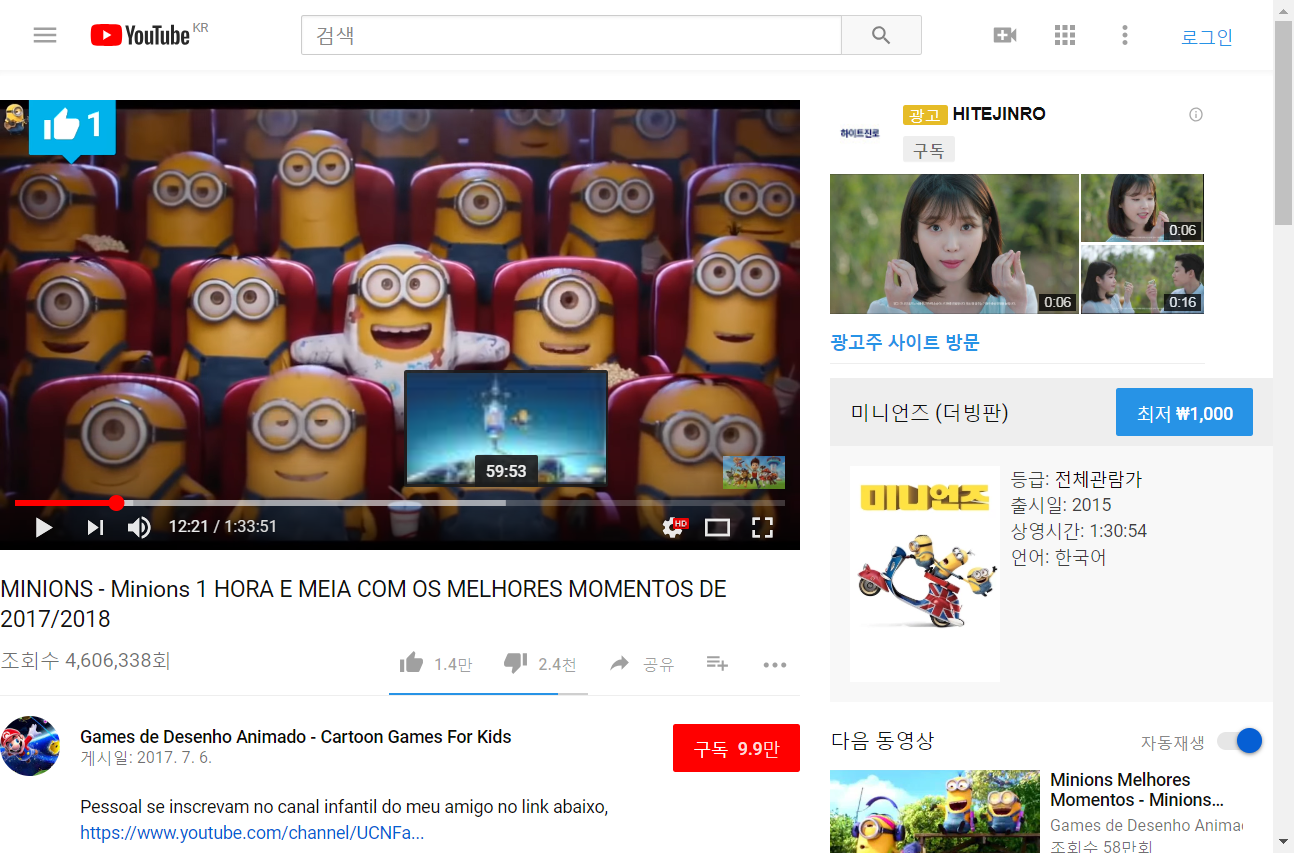

In [102]:
# 이미지 띄우기
pil_im = pil.open("screenshot.png")
print(pil_im.size)
pil_im

In [92]:
# id가 player-container인 엘리먼트 영역의 위치값 구하기
driver = webdriver.Chrome()
driver.get(url)

In [93]:
# 원래 사이즈
element = driver.find_element_by_css_selector('#player-container')
location = element.location
size = element.size
location, size

({'x': 0, 'y': 80}, {'height': 360, 'width': 640})

In [94]:
driver.quit()

In [103]:
# top, bottom, left, right
# 레티나 디스플레이의 경우 *2를 해줘야 합니다
left = location['x'] * 1920/1294
top = location['y'] * 1080/853
right = left + size['width'] * 1920/1294
bottom = top + size['height'] * 1080/853
area = (left, top, right, bottom)
area

(0.0, 101.28956623681125, 949.613601236476, 557.0926143024619)

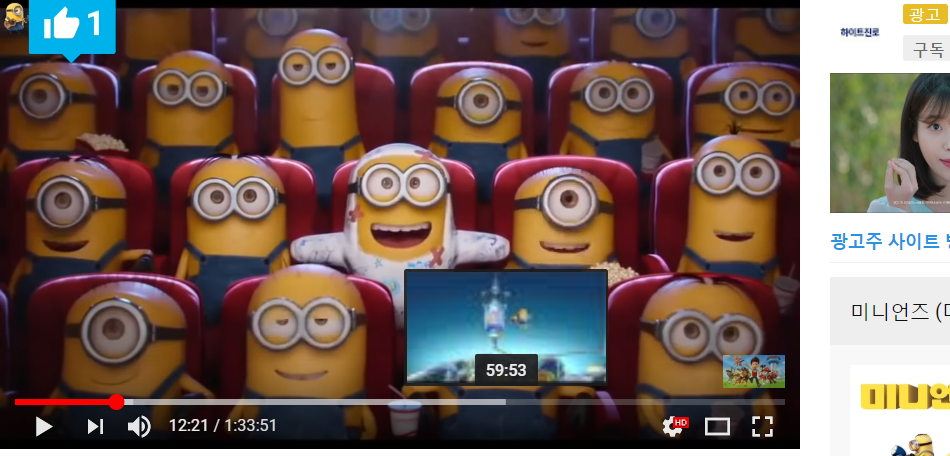

In [104]:
pil_im = pil_im.crop(area)
pil_im
#?

In [ ]:
pil_im.save("screenshot_element.png")

In [48]:
# 하단의 재생 기능 영역 자르기
driver = webdriver.Chrome()
driver.get(url)

In [57]:
element = driver.find_element_by_css_selector('.ytp-chrome-bottom')
location = element.location
size = element.size
location, size

({'x': 12, 'y': 401}, {'height': 39, 'width': 616})

In [98]:
left = location['x'] 
top = location['y'] 
right = left + size['width'] 
bottom = top + size['height'] - 39
area = (left, top, right, bottom)
area

(0, 80, 640, 401)

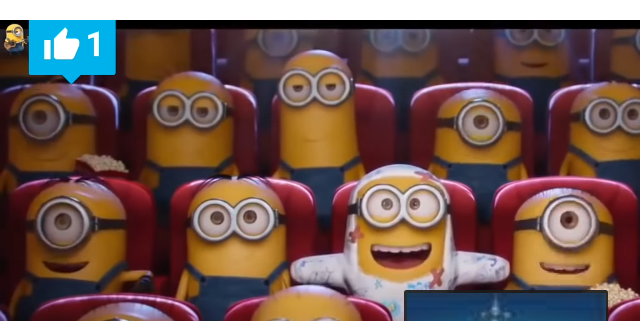

In [69]:
pil_im = pil.open('screenshot.png')
pil_im = pil_im.crop(area)
pil_im

In [70]:
pil_im.save("screenshot_element2.png")

#### 썸네일 만들기

In [105]:
pil_im.size

(950, 456)

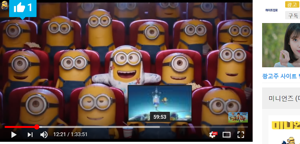

In [109]:
pil_im.thumbnail((300, 225))
pil_im

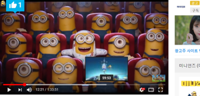

In [110]:
pil_im.thumbnail((200, 160))
pil_im

In [112]:
pil_im.save("thumnail.png")

In [111]:
# vision api 사용

In [113]:
url = "https://cloud.google.com/vision/"
driver = webdriver.Chrome()
driver.get(url)
time.sleep(1)
iframe = driver.find_element_by_css_selector("#vision_demo_section > iframe")
driver.switch_to_frame(iframe)
time.sleep(1)
file_path = "C:/Users/Administrator/Desktop/screenshot_element2.png"
driver.find_element_by_css_selector("#input").send_keys(file_path)
time.sleep(1)
driver.find_element_by_css_selector("#webDetection").click()
results = driver.find_elements_by_css_selector("#card .container > .row")[:15] #elements! 주의할 것. 하나 아니라 여러 개 갖고 오니까
for result in results:
    print(
    result.find_element_by_css_selector('.name').text,
    result.find_element_by_css_selector('.score').text
    )
driver.quit()

ElementNotVisibleException: Message: element not visible
  (Session info: chrome=67.0.3396.87)
  (Driver info: chromedriver=2.35.528161 (5b82f2d2aae0ca24b877009200ced9065a772e73),platform=Windows NT 6.1.7601 SP1 x86_64)
